In [177]:
#pip install -U imbalanced-learn

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import TruncatedSVD

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, plot_confusion_matrix

In [244]:
ls

Allison's Notebook.ipynb  Meaghan's Notebook.ipynb  Raylin's Notebook.ipynb


In [245]:
ls data 

ls: data: No such file or directory


In [246]:
df = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/project_4/NLP_project/data/judge_tweet_product_company.csv', encoding='latin1')

In [247]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [248]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

Rename columns
target columns 
Do we need to do cleaning for EDA?
Precsion is important 
dropping the 'i can't tell'
drop duplicates

In [249]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].sample(10)

2744    No emotion toward brand or product
8820                      Negative emotion
6624                      Positive emotion
3817                      Negative emotion
3111                      Positive emotion
2162                      Positive emotion
193                       Positive emotion
4545                      Positive emotion
8134    No emotion toward brand or product
6690    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: object

In [250]:
df['is_there_an_emotion_directed_at_a_brand_or_product'][8846]

"I can't tell"

In [251]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [252]:
df.duplicated().sum()

22

In [253]:
df.drop_duplicates(inplace=True)

In [254]:
df['target']= df['is_there_an_emotion_directed_at_a_brand_or_product']

In [255]:
df.drop('is_there_an_emotion_directed_at_a_brand_or_product', axis=1)

,tweet_text,emotion_in_tweet_is_directed_at,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [256]:
df['text']=df['tweet_text']

In [257]:
df.drop('tweet_text',axis=1, inplace=True)

In [259]:
df.dropna(subset=['text'], inplace=True)

In [342]:
df['length']= df['text'].str.len()

In [343]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text,tokenized,length
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. @wesley83 3g iphon . 3 hr tweet #rise_austin...,127
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,@jessede know @fludapp ? awesom ipad / iphon a...,139
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,@swonderlin wait #ipad 2 also . sale #sxsw .,79
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...,@sxsw hope year' festiv crashi year' iphon app...,82
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,@sxtxstate great stuff fri #sxsw : marissa may...,131


178

In [230]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer, word_tokenize

In [231]:
ps = PorterStemmer()

In [232]:
df['text'][0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [233]:
import re

In [166]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raylinsoriano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/raylinsoriano/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/raylinsoriano/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [156]:
#df['text'] = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        #  " ",          # Replace all non-letters with spaces
                       #   str(df['text']))

In [157]:
#tokenize = sent_tokenize(df['text'])

In [346]:
#for words in df['text']:
#    words = tokenize.word_tokenize(words)
#    for w in words:
#        print(ps.stem(w))

In [260]:
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [261]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [262]:
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the review corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    tweet_token = TweetTokenizer()
    doc = tweet_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    stemmer = PorterStemmer() 
    doc = [stemmer.stem(word) for word in doc]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [263]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [264]:
df['tokenized'] = df['text'].apply(doc_preparer)

In [348]:
pip install wordcloud

     |████████████████████████████████| 220 kB 8.0 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=159756 sha256=22dbe87deb7d49e43ad58d969104446b77f4a484d17fa6cad855d6c5c59d2d05
  Stored in directory: /Users/raylinsoriano/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [349]:

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [350]:
df

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,target,text,tokenized,length
0,iPhone,Negative emotion,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. @wesley83 3g iphon . 3 hr tweet #rise_austin...,127
1,iPad or iPhone App,Positive emotion,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,@jessede know @fludapp ? awesom ipad / iphon a...,139
2,iPad,Positive emotion,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,@swonderlin wait #ipad 2 also . sale #sxsw .,79
3,iPad or iPhone App,Negative emotion,Negative emotion,@sxsw I hope this year's festival isn't as cra...,@sxsw hope year' festiv crashi year' iphon app...,82
4,Google,Positive emotion,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,@sxtxstate great stuff fri #sxsw : marissa may...,131
...,...,...,...,...,...,...
9088,iPad,Positive emotion,Positive emotion,Ipad everywhere. #SXSW {link},ipad everywher . #sxsw { link },29
9089,NaN,No emotion toward brand or product,No emotion toward brand or product,"Wave, buzz... RT @mention We interrupt your re...","wave , buzz ... rt @mention interrupt regularl...",125
9090,NaN,No emotion toward brand or product,No emotion toward brand or product,"Google's Zeiger, a physician never reported po...","google' zeiger , physician never report potent...",145
9091,NaN,No emotion toward brand or product,No emotion toward brand or product,Some Verizon iPhone customers complained their...,verizon iphon custom complain time fell back h...,140


In [352]:
# Start with one review:
text = df.text[0]


text

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [353]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)


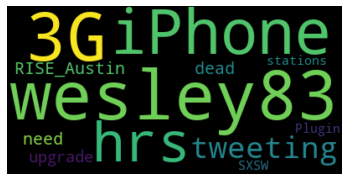

In [354]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [362]:
text1 = " ".join(review for review in df.text)
print ("There are {} words in the combination of all tweets.".format(len(text1)))


There are 961053 words in the combination of all tweets.


In [363]:
stopwords = set(STOPWORDS)

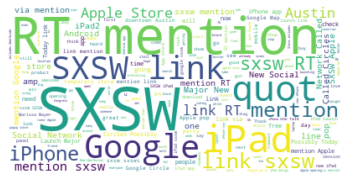

In [364]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Train Test Split

In [266]:


X_train, X_test, y_train, y_test = train_test_split(df['tokenized'], df['target'], random_state=42, stratify=df['target'])

In [267]:
X_train.shape

(6802,)

### Data Cleaning 

In [268]:
df_train = pd.concat([X_train, y_train], axis =1)


In [269]:
df_test = pd.concat([X_test, y_test], axis =1)


In [270]:
def drop_unidentified(df):
    '''
    Drop rows from DataFrame where the target is 'I can't tell'.
    '''
    df.drop(df.loc[df['target']=="I can't tell"].index, inplace=True)
    return df

In [271]:
def label(df):
    '''
    Encode values of the target to numerical data.
    '''
    df['target'] = df['target'].map({'No emotion toward brand or product': 0,
                                     'Negative emotion': 1,
                                     'Positive emotion': 2})
    return df

In [272]:
cleaning_pipeline = Pipeline(steps=[
    ('drop', FunctionTransformer(drop_unidentified)),
    ('label', FunctionTransformer(label))
])

In [273]:
df_train_clean = cleaning_pipeline.fit_transform(df_train)
df_test_clean = cleaning_pipeline.transform(df_test)

#### Logistic with stemming and lemming 

In [339]:
weights = {0: 1.0, 1: 2.0, 2: 1.5}
log_lem_pipe= imbpipe([('tifidf', TfidfVectorizer(stop_words=sw)),
                    ('log', LogisticRegression(max_iter=100000, class_weight=weights))
                     
                    ])

log_lem_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tifidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(class_weight={0: 1.0, 1: 2.0, 2: 1.5},
                                    max_iter=100000))])

In [340]:
print_cv_scores(log_lem_pipe, df_train_clean['tokenized'], df_train_clean['target'])

[0.8565819  0.84760658 0.85321616 0.85172027 0.85695587]
Training Accuracy 0.8532161555721766
##############
[0.66417352 0.68586387 0.67688856 0.68511593 0.65220643]
Cross_Val Accuracy 0.6728496634255795
##############
Training Macro Precision: 0.8673202405135626
Cross_Val Macro Precision: 0.6204462229803754
##############
Training Macro Recall: 0.771007295115868
Cross_Val Macro Recall: 0.5163821573957509
##############
Training Macro F1: 0.8067485266749091
Cross_Val Macro F1: 0.538757335543347


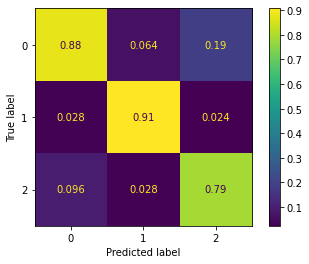

In [341]:
plot_confusion_matrix(log_lem_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

In [324]:
bayes_pipe = Pipeline([('tifidf', TfidfVectorizer(stop_words=sw)),
                    ('nb', MultinomialNB())
                     
                    ])
bayes_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Pipeline(steps=[('tifidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB(alpha=0))])

In [325]:
print_cv_scores(bayes_pipe,df_train_clean['tokenized'], df_train_clean['target'] )

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Users/raylinsoriano/anaconda3/lib/python3.8/site-pa

[0.88649963 0.88612565 0.88500374 0.88668661 0.89098728]
Training Accuracy 0.8870605833956621
##############
[0.66043381 0.64397906 0.64622289 0.66267764 0.64248317]
Cross_Val Accuracy 0.6511593118922963
##############
Training Macro Precision: 0.9012097615347828
Cross_Val Macro Precision: 0.5963882578692783
##############
Training Macro Recall: 0.8478719874792763
Cross_Val Macro Recall: 0.5045613648534482
##############
Training Macro F1: 0.8716324566915535
Cross_Val Macro F1: 0.5300633250337279


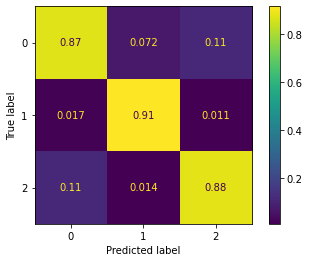

In [326]:
plot_confusion_matrix(bayes_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

#### First Model Pipline



In [197]:
sw = stopwords.words('english')

In [198]:


fsm_pipe= Pipeline([('cv', CountVectorizer(stop_words=sw)),
                    ('nb', MultinomialNB())
                     
                    ])

In [199]:
fsm_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [27]:
y_hat = fsm_pipe.predict(df_train_clean['text'])

In [28]:
accuracy_score(df_train_clean['target'], y_hat)

0.8250074783128926

In [29]:
confusion_matrix(df_train_clean['target'], y_hat)

array([[3655,   31,  346],
       [ 147,  191,   89],
       [ 554,    3, 1670]])

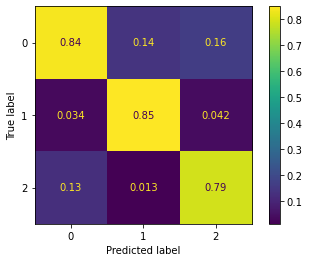

In [30]:
plot_confusion_matrix(fsm_pipe, df_train_clean['text'], df_train_clean['target'], normalize='pred')

In [31]:
#cross_val_score(MultinomialNB(),  df_train_clean['text'], df_train_clean['target'])

In [32]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

In [33]:
print_cv_scores(fsm_pipe, df_train_clean['text'], df_train_clean['target'])

[0.83320868 0.8315573  0.83716583 0.83174425 0.83062255]
Training Accuracy 0.8328597198981544
##############
[0.65620329 0.66566941 0.65220643 0.65445026 0.6776365 ]
Cross_Val Accuracy 0.6612331782664935
##############
Training Macro Precision: 0.8402823256340284
Cross_Val Macro Precision: 0.6235520169778846
##############
Training Macro Recall: 0.7073065001140836
Cross_Val Macro Recall: 0.47856438405752827
##############
Training Macro F1: 0.7507747531463266
Cross_Val Macro F1: 0.49794966918633354


In [34]:
sec_pipe= imbpipe([('tifid', TfidfVectorizer(stop_words=sw)),
                    ('smote', SMOTE(random_state=42)),
                    ('nb', MultinomialNB())
                     
                    ])

In [35]:
sec_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(random_state=42)), ('nb', MultinomialNB())])

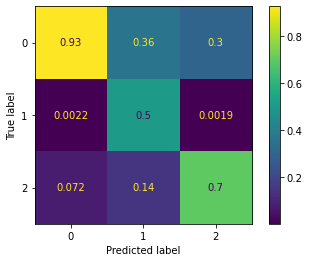

In [36]:
plot_confusion_matrix(sec_pipe, df_train_clean['text'], df_train_clean['target'], normalize='pred')

In [185]:
print_cv_scores(sec_pipe, df_train_clean['text'], df_train_clean['target'])

[0.79394166 0.80164517 0.79323238 0.79622359 0.79398018]
Training Accuracy 0.7958045968091395
##############
[0.5799701  0.59461481 0.57068063 0.57666417 0.59760658]
Cross_Val Accuracy 0.5839072595206233
##############
Training Macro Precision: 0.7220145734861586
Cross_Val Macro Precision: 0.505769334019282
##############
Training Macro Recall: 0.858773519015488
Cross_Val Macro Recall: 0.5774607393080815
##############
Training Macro F1: 0.7609760019135543
Cross_Val Macro F1: 0.5167083774129507


### Running Logistic Models

In [37]:
param = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1]
        }

In [38]:
log_pipe= Pipeline([('cv', CountVectorizer(stop_words=sw)),
                    ('log', LogisticRegression(max_iter=100000))
                     
                    ])

log_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log', LogisticRegression(max_iter=100000))])

In [223]:
grid = GridSearchCV(log_pipe, param, scoring= 'precision_macro',cv=5)

In [202]:
grid.fit(df_train_clean['text'], df_train_clean['target'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [203]:
grid.best_estimator_

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log', LogisticRegression(max_iter=1000))])

In [204]:
grid.best_params_

{'log__class_weight': None, 'log__tol': 0.0001}

In [205]:
grid.best_score_

0.6200105211453915

In [63]:
print_cv_scores(log_pipe, df_train_clean['text'], df_train_clean['target'])

[0.92183994 0.9212937  0.9209198  0.92353711 0.92148065]
Training Accuracy 0.9218142396687293
##############
[0.67713004 0.6881077  0.68362004 0.67389678 0.67539267]
Cross_Val Accuracy 0.679629449507129
##############
Training Macro Precision: 0.9450352765352561
Cross_Val Macro Precision: 0.6200105211453915
##############
Training Macro Recall: 0.8790958617664917
Cross_Val Macro Recall: 0.5224336726940089
##############
Training Macro F1: 0.9081806986636474
Cross_Val Macro F1: 0.5479293229316939


##### running logistic with smote

In [39]:
log_smote_pipe= imbpipe([('cv', CountVectorizer(stop_words=sw)),
                    ('smote', SMOTE(random_state=42)),
                    ('log', LogisticRegression(max_iter=1000))
                     
                    ])

log_smote_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote', SMOTE(random_state=42)),
                ('log', LogisticRegression(max_iter=1000))])

In [207]:
grid2 = GridSearchCV(log_smote_pipe, param, scoring= 'precision_macro',cv=5)

In [208]:
grid2.fit(df_train_clean['text'], df_train_clean['target'])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [209]:
grid2.best_params_

{'log__class_weight': None, 'log__tol': 0.0001}

In [210]:
grid2.best_score_

0.5008482161299347

The model did worst with smoteing

In [40]:
print_cv_scores(log_smote_pipe, df_train_clean['text'], df_train_clean['target'])

[0.90052356 0.89549448 0.89605534 0.90315947 0.89661619]
Training Accuracy 0.8983698083215634
##############
[0.60762332 0.61256545 0.60957367 0.61106956 0.63051608]
Cross_Val Accuracy 0.6142696150608249
##############
Training Macro Precision: 0.8639969509739605
Cross_Val Macro Precision: 0.5008482161299347
##############
Training Macro Recall: 0.884176477266094
Cross_Val Macro Recall: 0.5288772099777101
##############
Training Macro F1: 0.8736002995230747
Cross_Val Macro F1: 0.5106749517847732


##### Adding more paramters to grid search

In [41]:
param2 = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1],
         'log__C' : [0.0001,0.001,0.01],
         'log__penalty': ['l2','none']
        }


In [226]:
grid3 = GridSearchCV(log_pipe, param2, scoring= 'precision_macro',cv=5, verbose=2)

In [227]:
grid3.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  17.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  19.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  36.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  13.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   6.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  11.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   6.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.6s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=l

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  51.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  15.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  30.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  31.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  28.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   7.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  13.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  13.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   1.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s
[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  46.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  18.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  44.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  21.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   8.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  14.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  10.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  18.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   5.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.6s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.3s
[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=l2, log__to

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  50.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  16.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  30.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  29.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  24.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  10.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   9.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  14.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.001, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  43.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  18.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  46.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  25.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  40.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  13.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=   6.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  10.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.01; total time=  16.6s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   2.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   6.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   3.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=None, log__penalty=none, log__tol=0.1; total time=   4.1s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.7s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.0001; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.5s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; total time=   0.4s
[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=l2, log__tol=0.01; to

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  59.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  21.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  28.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  23.7s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.0001; total time=  23.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  10.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   8.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  11.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=   8.8s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.01; total time=  12.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   4.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   3.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.01, log__class_weight=balanced, log__penalty=none, log__tol=0.1; total time=   2.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
    

In [228]:
grid3.best_params_

{'log__C': 0.0001,
 'log__class_weight': 'balanced',
 'log__penalty': 'none',
 'log__tol': 0.1}

In [229]:
grid3.best_score_


0.5551151136118678

In [237]:
grid4 = GridSearchCV(fouth_pipe, param2, scoring= 'precision_macro',cv=5, verbose=2)

In [248]:
grid4.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.4s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.01; total time=   0.5s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END log__C=0.0001, log__class_weight=None, log__penalty=l2, log__tol=0.1; total time=   0.3s
[CV] END log__C=0.0001, log__class_weight=None, log__penalty=none, log__tol=0.0001; total time=  20.9s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


KeyboardInterrupt: 

In [239]:
grid4.best_params_

{'log__C': 0.0001,
 'log__class_weight': 'balanced',
 'log__penalty': 'none',
 'log__tol': 0.1}

In [262]:
pd.DataFrame(grid4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log__C,param_log__class_weight,param_log__penalty,param_log__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278504,0.038912,0.035829,0.003117,0.0001,None,l2,0.0001,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
1,0.376056,0.146469,0.045577,0.011984,0.0001,None,l2,0.01,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
2,0.282032,0.040177,0.037444,0.003919,0.0001,None,l2,0.1,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.201046,0.200947,0.200947,0.200947,0.201197,0.201017,0.000098,28
3,38.343950,18.081782,0.033084,0.000870,0.0001,None,none,0.0001,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.520345,0.505732,0.527085,0.577597,0.557138,0.537579,0.026097,13
4,7.028473,1.044938,0.037045,0.009136,0.0001,None,none,0.01,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.530772,0.536844,0.553306,0.569889,0.576456,0.553453,0.017830,7
5,2.380358,0.242761,0.040816,0.005315,0.0001,None,none,0.1,"{'log__C': 0.0001, 'log__class_weight': None, ...",0.543358,0.543256,0.589236,0.567854,0.549454,0.558632,0.017752,4
6,0.283194,0.150184,0.036009,0.003202,0.0001,balanced,l2,0.0001,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472759,0.482222,0.457642,0.475202,0.478478,0.473261,0.008432,25
7,0.227536,0.051624,0.038025,0.004254,0.0001,balanced,l2,0.01,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472507,0.482222,0.457642,0.474634,0.478247,0.473050,0.008383,26
8,0.271059,0.131663,0.036090,0.004156,0.0001,balanced,l2,0.1,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.472507,0.482222,0.457642,0.474634,0.478247,0.473050,0.008383,26
9,39.783170,20.314403,0.032893,0.002643,0.0001,balanced,none,0.0001,"{'log__C': 0.0001, 'log__class_weight': 'balan...",0.519963,0.506747,0.508115,0.607092,0.540520,0.536487,0.037320,16


In [247]:
grid4.best_score_

0.5638306817740808

#### With Tifid

In [64]:
fouth_pipe= imbpipe([('tifid', TfidfVectorizer(stop_words=sw)),
                    ('log' , LogisticRegression(max_iter=1000000)),
                
                     
                    ])

In [240]:
print_cv_scores(fouth_pipe,df_train_clean['text'], df_train_clean['target'])

[0.81881077 0.81547953 0.8197794  0.81734904 0.81753599]
Training Accuracy 0.8177909445044076
##############
[0.66367713 0.69109948 0.67614061 0.6724009  0.69783096]
Cross_Val Accuracy 0.6802298164352962
##############
Training Macro Precision: 0.87802205964075
Cross_Val Macro Precision: 0.7032293662332516
##############
Training Macro Recall: 0.5981580318610696
Cross_Val Macro Recall: 0.4590756027318907
##############
Training Macro F1: 0.6320359439296835
Cross_Val Macro F1: 0.4667041837824696


In [ ]:
#ngram_range =(1,2)

In [258]:
fifth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                    ('log' , LogisticRegression(max_iter=1000000, C= 0.0001,class_weight='balanced',
                                                penalty= 'none',tol= 0.1)),
                
                     
                    ])

In [260]:
fifth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(C=0.0001, class_weight='balanced',
                                    max_iter=1000000, penalty='none',
                                    tol=0.1))])

In [261]:
print_cv_scores(fifth_pipe,df_train_clean['text'], df_train_clean['target'])

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[0.98840688 0.9882221  0.98448308 0.9878482  0.98616564]
Training Accuracy 0.9870251787953291
##############
[0.68011958 0.6776365  0.66043381 0.66566941 0.67539267]
Cross_Val Accuracy 0.6718503934807083
##############
Training Macro Precision: 0.9848671329397526
Cross_Val Macro Precision: 0.6231240361915524
##############
Training Macro Recall: 0.9919403682265129
Cross_Val Macro Recall: 0.5239971263032704
##############
Training Macro F1: 0.9883198471808358
Cross_Val Macro F1: 0.5479610817113028


In [113]:
sixth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                    ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                penalty= 'none',tol= 0.1)),
                
                     
                    ])

In [114]:
sixth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('log',
                 LogisticRegression(class_weight='balanced',
                                    max_iter=1000000))])

In [115]:
print_cv_scores(sixth_pipe,df_train_clean['text'], df_train_clean['target'])

[0.91604338 0.91475042 0.91344176 0.91661993 0.91848944]
Training Accuracy 0.9158689864789944
##############
[0.67040359 0.67165295 0.6551982  0.65370232 0.67539267]
Cross_Val Accuracy 0.6652699471073382
##############
Training Macro Precision: 0.8833719129571953
Cross_Val Macro Precision: 0.5756767754054304
##############
Training Macro Recall: 0.9418603957551799
Cross_Val Macro Recall: 0.5793933316336125
##############
Training Macro F1: 0.9091960599181986
Cross_Val Macro F1: 0.5757783676869849


#### Trying grid search with different solvers

In [270]:
param5 = {'log__class_weight': [None, 'balanced'], 
         'log__tol': [0.0001, 0.01, 0.1],
         'log__penalty': ['none'],
         'log__solver':['newton-cg', 'sag', 'saga', 'lbfgs']
        }

In [272]:
grid5 = GridSearchCV(seventh_pipe, param3, scoring= 'precision_macro',cv=5, verbose=2)

In [ ]:
grid5.fit(df_train_clean['text'], df_train_clean['target'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  54.6s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  53.1s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time= 2.9min
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  12.4s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.0001; total time=  16.4s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   5.5s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   5.2s
[CV] END log__class_weight=None, log__penalty=none, log__solver=newton-cg, log__tol=0.01; total time=   6.3s
[CV] END log__class_weight=None, log__penalty=none, log_

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END log__class_weight=None, log__penalty=none, log__solver=saga, log__tol=0.0001; total time=89.0min


not worth the time.

#### Trying with an SVD Model

In [110]:
seventh_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                        ('ss', StandardScaler(with_mean=False)),
                        ('tsvd', TruncatedSVD(random_state=42)),  
                        ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

In [111]:
seventh_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('tsvd', TruncatedSVD(random_state=42)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000000,
                                    tol=0.1))])

In [112]:
print_cv_scores(seventh_pipe, df_train_clean['text'], df_train_clean['target'])

[0.35471204 0.45148626 0.33557674 0.34230697 0.33183773]
Training Accuracy 0.36318394885181843
##############
[0.38863976 0.44801795 0.37771129 0.36724009 0.35228123]
Cross_Val Accuracy 0.3867780643588875
##############
Training Macro Precision: 0.3590325644813809
Cross_Val Macro Precision: 0.3651013722876853
##############
Training Macro Recall: 0.3863150106552157
Cross_Val Macro Recall: 0.39608680543687463
##############
Training Macro F1: 0.28604701846514163
Cross_Val Macro F1: 0.30428138451969533


In [118]:
eigth_pipe= Pipeline([('tifid', TfidfVectorizer(stop_words=sw, ngram_range=(1,2))),
                        ('ss', StandardScaler(with_mean=False)),
                        ('tsvd', TruncatedSVD(n_components=100, random_state=42)),  
                        ('log' , LogisticRegression(max_iter=1000000,class_weight='balanced',
                                                tol= 0.1)),
                
                     
                    ])

eigth_pipe.fit(df_train_clean['text'], df_train_clean['target'])

Pipeline(steps=[('tifid',
                 TfidfVectorizer(ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('tsvd', TruncatedSVD(n_components=100, random_state=42)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=1000000,
                                    tol=0.1))])

In [119]:
print_cv_scores(seventh_pipe, df_train_clean['text'], df_train_clean['target'])

[0.35471204 0.45148626 0.33557674 0.34230697 0.33183773]
Training Accuracy 0.36318394885181843
##############
[0.38863976 0.44801795 0.37771129 0.36724009 0.35228123]
Cross_Val Accuracy 0.3867780643588875
##############
Training Macro Precision: 0.3590325644813809
Cross_Val Macro Precision: 0.3651013722876853
##############
Training Macro Recall: 0.3863150106552157
Cross_Val Macro Recall: 0.39608680543687463
##############
Training Macro F1: 0.28604701846514163
Cross_Val Macro F1: 0.30428138451969533
